In [1]:
import pandas as pd

In [125]:
df=pd.read_csv("rideshare_kaggle.csv").sample(n=10000,random_state=42)

In [126]:
df.size

570000

In [127]:
df.shape

(10000, 57)

A1. Take any 2 features from your project having has real numeric values. Make a scatter plot of the data and observe the pattern.

In [128]:
f1=df.iloc[:,23]
f2=df.iloc[:,39]

In [129]:
print(f1)
print(f2)

441132    0.73
274010    0.73
532981    0.65
428480    0.80
194181    0.93
          ... 
449904    0.95
603008    0.84
68501     0.71
407501    0.94
94857     0.83
Name: humidity, Length: 10000, dtype: float64
441132    285
274010    246
532981     99
428480    217
194181    219
         ... 
449904    166
603008    135
68501     261
407501    278
94857     136
Name: windBearing, Length: 10000, dtype: int64


In [130]:
import matplotlib.pyplot as plt

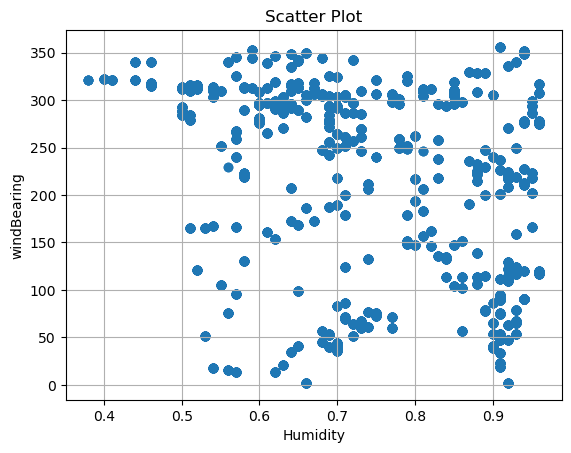

In [131]:
plt.title("Scatter Plot")
plt.scatter(f1,f2)
plt.xlabel("Humidity")
plt.ylabel("windBearing")
plt.grid(True)
plt.show()

In [132]:
f3=df.iloc[:,24]
f4=df.iloc[:,25]

In [133]:
print(f3)
print(f4)

441132    6.38
274010    7.03
532981    3.03
428480    2.20
194181    5.38
          ... 
449904    1.44
603008    1.90
68501     5.42
407501    2.45
94857     2.07
Name: windSpeed, Length: 10000, dtype: float64
441132     9.37
274010    10.51
532981     3.03
428480     4.28
194181     8.31
          ...  
449904     1.44
603008     3.29
68501      6.95
407501     2.45
94857      3.50
Name: windGust, Length: 10000, dtype: float64


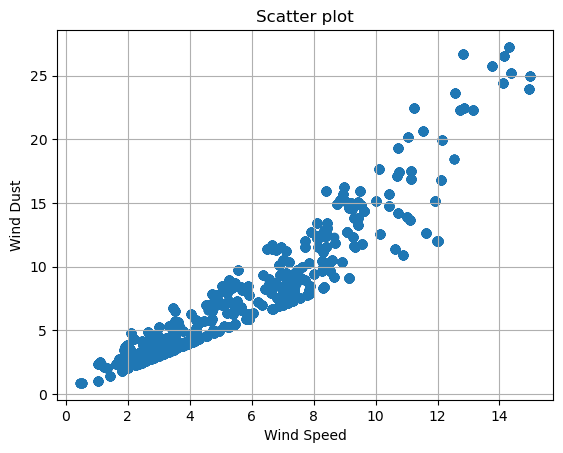

In [134]:
plt.scatter(f3,f4)
plt.title("Scatter plot")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Dust")
plt.grid(True)
plt.show()

A2. Create a linear regression model on this data. Consider using one feature as independent variable while the other as dependent variable (you may also round this number to integer). After the model is created, calculate the mean square error by predicting the values from the model. 

In [135]:
dependent_variable=df.iloc[:,12]
independent_variable=df.iloc[:,18]

In [136]:
dependent_variable

441132     8.0
274010    13.5
532981     NaN
428480     NaN
194181    13.5
          ... 
449904     5.0
603008     9.5
68501      NaN
407501    14.0
94857     34.0
Name: price, Length: 10000, dtype: float64

In [137]:
independent_variable

441132    35.21
274010    34.07
532981    38.55
428480    30.58
194181    42.30
          ...  
449904    47.27
603008    37.96
68501     32.06
407501    47.71
94857     38.19
Name: apparentTemperature, Length: 10000, dtype: float64

In [138]:
import numpy as np

In [139]:
y_bar = dependent_variable.mean()
print(y_bar)

16.567614311966274


In [140]:
x_bar=independent_variable.mean()
print(x_bar)

35.967157


In [141]:
num=0
dem=0
dependent_variable=dependent_variable.dropna()
for i,j in zip(independent_variable,dependent_variable):
    t=(i-x_bar)
    q=float(j-y_bar)
    num+=float(t*q)
    dem+=float(t**2)
print(num)
print(dem)
theta1=num/dem
print(theta1)

7956.233815263196
574206.1838901911
0.013856057350968402


In [142]:
theta0=y_bar-(theta1*x_bar)
print(theta0)

16.06925132182299


y=mx+c

y=theta1*x+theta0

In [143]:
predicted_values=[]
for i in independent_variable:
    value=theta1*i+theta0
    predicted_values.append(value)
print(predicted_values)

[16.557123101150587, 16.54132719577048, 16.60340233270282, 16.492969555615602, 16.655362547768952, 16.438653810799806, 16.5115366724659, 16.596197182880317, 16.540495832329423, 16.24453044731274, 16.592040365675025, 16.667832999384824, 16.68778572197022, 16.54617681584332, 16.733787832375434, 16.561834160649916, 16.510151066730803, 16.649681564255054, 16.625572024464372, 16.49851197855599, 16.547285300431398, 16.53800174200625, 16.518187579994365, 16.49920478142354, 16.519157504008934, 16.52054310974403, 16.522621518346675, 16.655362547768952, 16.50211455346724, 16.74030017933039, 16.736004801551587, 16.574858854559825, 16.601878166394215, 16.554213329106883, 16.5945344559982, 16.57790718717704, 16.562249842370445, 16.588992033057814, 16.504470083216905, 16.54617681584332, 16.58649794273464, 16.263513245883566, 16.47232403016266, 16.58649794273464, 16.520958791464558, 16.56335832695852, 16.640952248123945, 16.55601461656251, 16.56959355276646, 16.60340233270282, 16.732540787213846, 16.

In [144]:
n=len(independent_variable)
mean_square_error=0
for i,j in zip(predicted_values,independent_variable):
    mean_square_error += ((i-j)**2)/n
print(mean_square_error)

437.2149413190866


A3. Study all the parameters and attributes associated with linear regression model

In linear regression model output is the dependent variable and inputs are independent variables.
Theta1 is numerator/demoniator
Numerator is the sum of producut of diffrences of x(i)[independents] with its mean and y(i)[dependent variable] with its mean.i.e., sigma((x(i)=x_bar)*(y(i)-y_bar))
Denomiator is the sum of square od diffrences of x(i)
y=theta1*x+theta0
Here y is the predicted values
Mean square error is the sum of predicted value minus actual value whole square divided by n(where n is the length of column)